In [1]:
from google.colab import files

uploaded = files.upload()

Saving SalaryData_Train.csv.crdownload to SalaryData_Train.csv.crdownload


In [2]:
#1) Prepare a classification model using Naive Bayes for salary data
import pandas as pd
import numpy as np
df=pd.read_csv('SalaryData_Train.csv.crdownload')
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29124,59,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,20.0,United-States,>50K
29125,25,Private,Some-college,10,Never-married,Transport-moving,Not-in-family,White,Male,0.0,0.0,55.0,United-States,<=50K
29126,39,Private,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688.0,0.0,45.0,United-States,>50K
29127,53,Private,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,40.0,United-States,>50K


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29129 entries, 0 to 29128
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            29129 non-null  int64  
 1   workclass      29129 non-null  object 
 2   education      29129 non-null  object 
 3   educationno    29129 non-null  int64  
 4   maritalstatus  29129 non-null  object 
 5   occupation     29129 non-null  object 
 6   relationship   29128 non-null  object 
 7   race           29128 non-null  object 
 8   sex            29128 non-null  object 
 9   capitalgain    29128 non-null  float64
 10  capitalloss    29128 non-null  float64
 11  hoursperweek   29128 non-null  float64
 12  native         29128 non-null  object 
 13  Salary         29128 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 3.1+ MB


In [4]:
from google.colab import files

uploaded = files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [6]:
df1=pd.read_csv('SalaryData_Test.csv')
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
print('train data size:',df.shape)
print('test data size:',df1.shape)

train data size: (29129, 14)
test data size: (15060, 14)


In [8]:
df['Salary'].value_counts()

 <=50K    21891
 >50K      7237
Name: Salary, dtype: int64

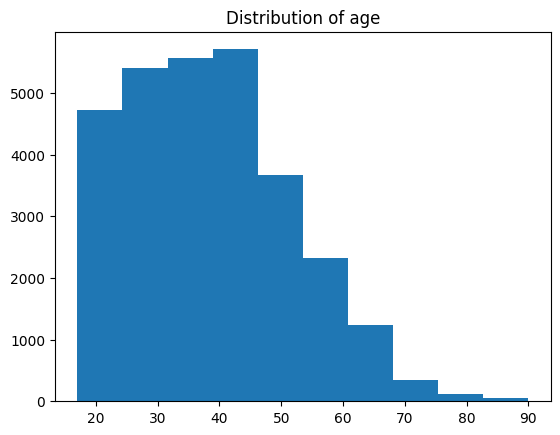

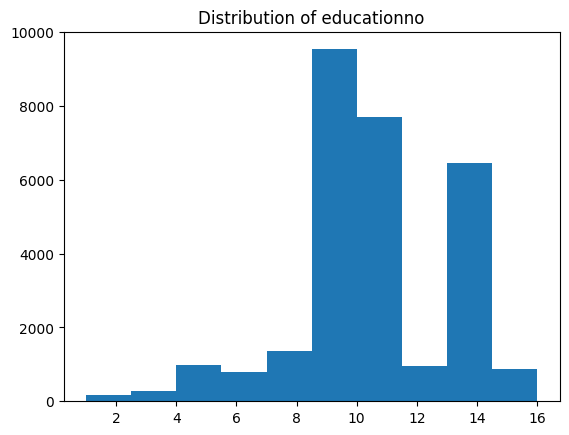

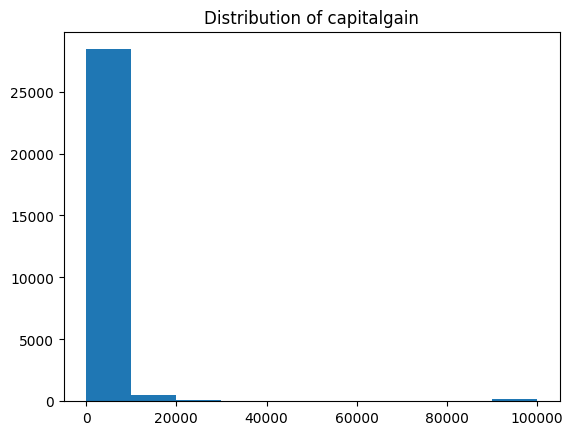

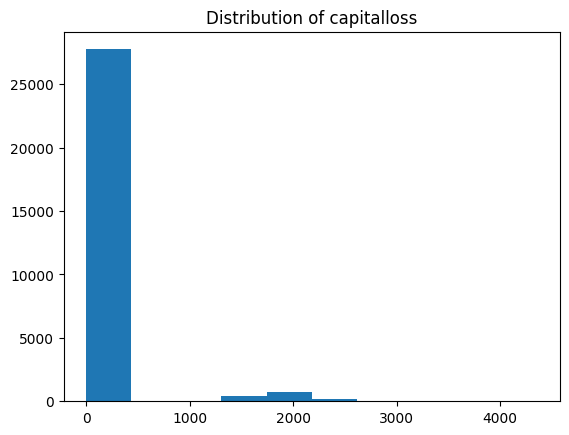

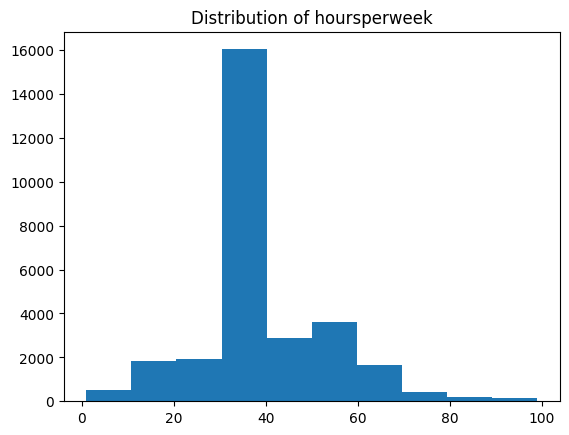

--- workclass vs Salary ---
                   count unique     top   freq
workclass                                     
 Federal-gov         908      2   <=50K    558
 Local-gov          1998      2   <=50K   1419
 Private           21521      2   <=50K  16816
 Self-emp-inc       1036      2    >50K    577
 Self-emp-not-inc   2414      2   <=50K   1727
 State-gov          1238      2   <=50K    899
 Without-pay          13      1   <=50K     13
workclass          Salary
 Federal-gov        <=50K      558
                    >50K       350
 Local-gov          <=50K     1419
                    >50K       579
 Private            <=50K    16816
                    >50K      4705
 Self-emp-inc       >50K       577
                    <=50K      459
 Self-emp-not-inc   <=50K     1727
                    >50K       687
 State-gov          <=50K      899
                    >50K       339
 Without-pay        <=50K       13
Name: Salary, dtype: int64
--- education vs Salary ---
             

In [16]:
# prompt: write a code to eda for df and df1 data set

# Data Exploration and Analysis for df

# 1. Check for missing values
df.isnull().sum()

# 2. Check for unique values in each column
df.nunique()

# 3. Check the data types of each column
df.dtypes

# 4. Calculate descriptive statistics for numerical columns
df.describe()

# 5. Visualize the distribution of each numerical column
import matplotlib.pyplot as plt

for col in df.select_dtypes(include=['int64', 'float64']):
  plt.hist(df[col], bins=10)
  plt.title(f"Distribution of {col}")
  plt.show()

# 6. Analyze the relationship between categorical variables and the target variable
for col in df.select_dtypes(include=['object']):
  print(f"--- {col} vs Salary ---")
  print(df.groupby(col)['Salary'].describe())
  print(df.groupby(col)['Salary'].value_counts())

# Repeat the same steps for df1


checking for missing values age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64
check for unique values in each column age               73
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      110
capitalloss       79
hoursperweek      89
native            40
Salary             2
dtype: int64
check the data types of each columns age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           objec

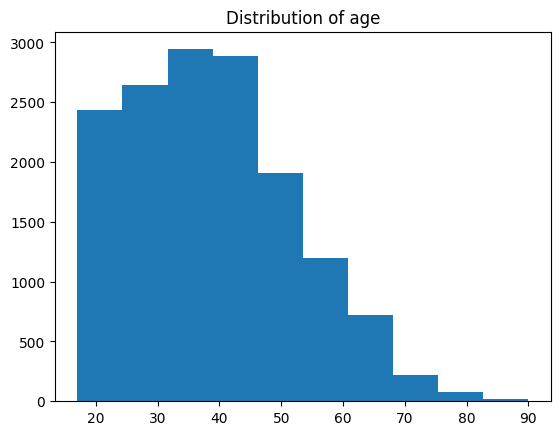

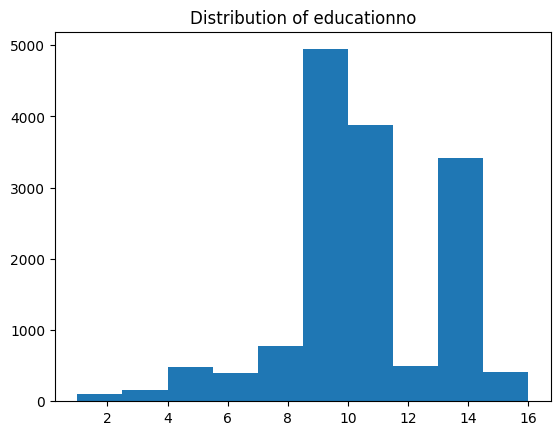

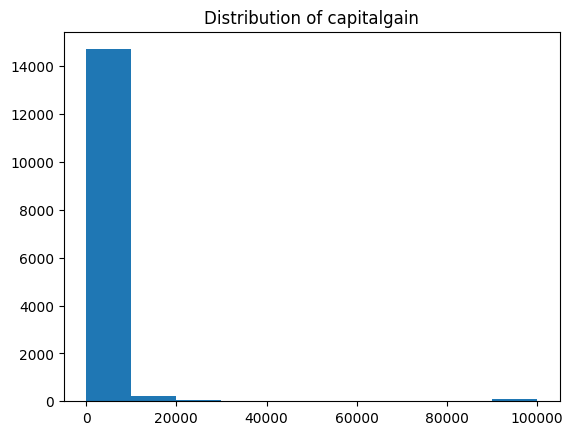

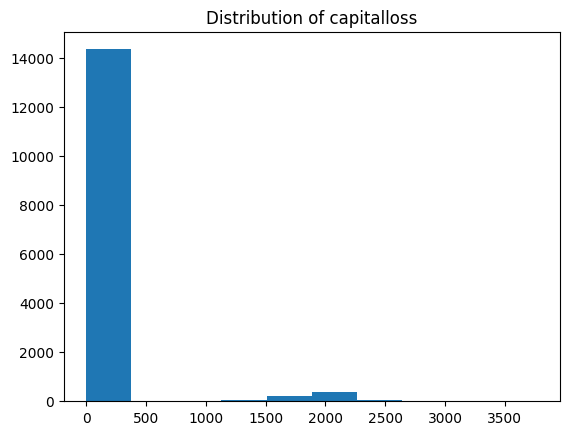

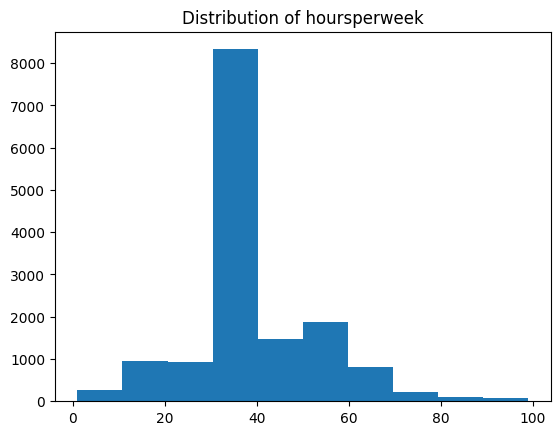

--- workclass vs Salary ---
                   count unique     top  freq
workclass                                    
 Federal-gov         463      2   <=50K   279
 Local-gov          1033      2   <=50K   727
 Private           11021      2   <=50K  8646
 Self-emp-inc        572      2    >50K   312
 Self-emp-not-inc   1297      2   <=50K   952
 State-gov           667      2   <=50K   491
 Without-pay           7      2   <=50K     5
workclass          Salary
 Federal-gov        <=50K     279
                    >50K      184
 Local-gov          <=50K     727
                    >50K      306
 Private            <=50K    8646
                    >50K     2375
 Self-emp-inc       >50K      312
                    <=50K     260
 Self-emp-not-inc   <=50K     952
                    >50K      345
 State-gov          <=50K     491
                    >50K      176
 Without-pay        <=50K       5
                    >50K        2
Name: Salary, dtype: int64
--- education vs Salary ---
 

In [18]:
# prompt: write a code to eda for df and df1 data set

# Data Exploration and Analysis for df

# 1. Check for missing values
print("checking for missing values",df1.isnull().sum())

# 2. Check for unique values in each column
print('check for unique values in each column',df1.nunique())

# 3. Check the data types of each column
print('check the data types of each columns', df1.dtypes)

# 4. Calculate descriptive statistics for numerical columns
print('Calculate descriptive statistics for numerical columns',df1.describe() )

# 5. Visualize the distribution of each numerical column
import matplotlib.pyplot as plt

for col in df.select_dtypes(include=['int64', 'float64']):
  plt.hist(df1[col], bins=10)
  plt.title(f"Distribution of {col}")
  plt.show()

# 6. Analyze the relationship between categorical variables and the target variable
for col in df.select_dtypes(include=['object']):
  print(f"--- {col} vs Salary ---")
  print(df1.groupby(col)['Salary'].describe())
  print(df1.groupby(col)['Salary'].value_counts())

# Repeat the same steps for df1


In [24]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for i in range(1,14,1):
    df.iloc[:,i] = LE.fit_transform(df.iloc[:,i])

for i in range(1,14,1):
    df1.iloc[:,i] = LE.fit_transform(df1.iloc[:,i])



<ipython-input-24-b8837438a516>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,i] = LE.fit_transform(df.iloc[:,i])
<ipython-input-24-b8837438a516>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,i] = LE.fit_transform(df.iloc[:,i])
<ipython-input-24-b8837438a516>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem

In [25]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,12,4,1,1,4,1,23,0,39,37,0
1,50,4,9,12,2,4,0,4,1,0,0,12,37,0
2,38,2,11,8,0,6,1,4,1,0,0,39,37,0
3,53,2,1,6,2,6,0,2,1,0,0,39,37,0
4,28,2,9,12,2,10,5,2,0,0,0,39,4,0


In [26]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,6,4,6,3,2,1,0,0,39,37,0
1,38,2,11,8,2,4,0,4,1,0,0,49,37,0
2,28,1,7,11,2,10,0,4,1,0,0,39,37,1
3,44,2,15,9,2,6,0,2,1,87,0,39,37,1
4,34,2,0,5,4,7,1,4,1,0,0,29,37,0


In [31]:
Y = df['Salary']
X = df.drop(['age'],axis=1)
X.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29129 entries, 0 to 29128
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            29129 non-null  int64
 1   workclass      29129 non-null  int64
 2   education      29129 non-null  int64
 3   educationno    29129 non-null  int64
 4   maritalstatus  29129 non-null  int64
 5   occupation     29129 non-null  int64
 6   relationship   29129 non-null  int64
 7   race           29129 non-null  int64
 8   sex            29129 non-null  int64
 9   capitalgain    29129 non-null  int64
 10  capitalloss    29129 non-null  int64
 11  hoursperweek   29129 non-null  int64
 12  native         29129 non-null  int64
 13  Salary         29129 non-null  int64
dtypes: int64(14)
memory usage: 3.1 MB


In [39]:
Y_test = df1['Salary']
X_test = df1.drop(['age'],axis=1)
X.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29129 entries, 0 to 29128
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            29129 non-null  int64
 1   workclass      29129 non-null  int64
 2   education      29129 non-null  int64
 3   educationno    29129 non-null  int64
 4   maritalstatus  29129 non-null  int64
 5   occupation     29129 non-null  int64
 6   relationship   29129 non-null  int64
 7   race           29129 non-null  int64
 8   sex            29129 non-null  int64
 9   capitalgain    29129 non-null  int64
 10  capitalloss    29129 non-null  int64
 11  hoursperweek   29129 non-null  int64
 12  native         29129 non-null  int64
 13  Salary         29129 non-null  int64
dtypes: int64(14)
memory usage: 3.1 MB


In [32]:
# Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30)

In [33]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()

# model fitting
MNB.fit(X_train,Y_train)
Y_pred_train = MNB.predict(X_train)
Y_pred_test = MNB.predict(X_test)

from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Training Accuracy score: ", round(ac1,2))
print("Testing Accuracy score: ", round(ac2,2))

Training Accuracy score:  0.78
Testing Accuracy score:  0.77


In [34]:
# cross validation method
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30,random_state=i)
    MNB.fit(X_train,Y_train)
    Y_pred_train = MNB.predict(X_train)
    Y_pred_test = MNB.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))


Cross validation Training score:  0.77
Cross validation Test score:  0.77


In [41]:
# Preprocess test data
X_test = df1.drop(['age'], axis=1)  # Assuming 'test_data' is your test dataset
# Apply the same preprocessing steps as applied to training data

# Make predictions
y_pred = MNB.predict(X_test)


In [43]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(Y_test, y_pred))

Accuracy: 0.7720451527224436
              precision    recall  f1-score   support

           0       0.81      0.94      0.87     11360
           1       0.61      0.27      0.37      3700
           2       0.00      0.00      0.00         0

    accuracy                           0.77     15060
   macro avg       0.47      0.40      0.41     15060
weighted avg       0.76      0.77      0.75     15060



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
